In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import unique
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [2]:
#1.a
a=pd.read_csv('/Users/abelabykuriakose/Downloads/signal-data.csv')
a.shape

(1567, 592)

In [122]:
#1B
new = pd.DataFrame(a.describe().transpose())
new

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

<AxesSubplot:title={'center':'max'}, xlabel='max', ylabel='Density'>

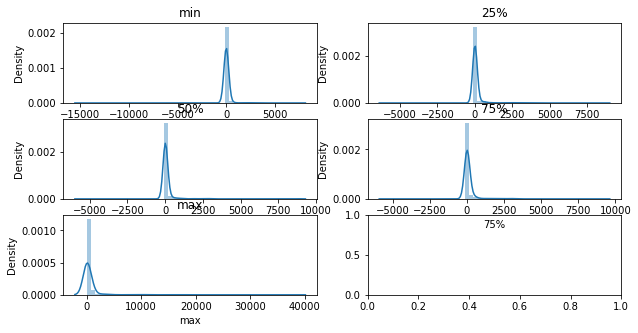

In [123]:
#considering for part of 3 as well. visualtisation the data.

figure, axes = plt.subplots(3, 2, sharex=True, figsize=(10,5))

plt.subplot(3,2,1)
plt.title('min')
sns.distplot(new['min'])

plt.subplot(3,2,2)
plt.title('25%')
sns.distplot(new['25%'])

plt.subplot(3,2,3)
plt.title('50%')
sns.distplot(new['50%'])

plt.subplot(3,2,4)
plt.title('75%')
sns.distplot(new['75%'])

plt.subplot(3,2,5)
plt.title('max')
sns.distplot(new['max'])

visualising the distribution of the 5 point summary of the data set.
1. all the values of the 5 point summary are distributed aroun the zero value.range of values values is betwen -1 and 1.
2. max value crosses 0.0010m while min value is around 0.002


In [3]:
    columns = a.columns
    for col in columns:
        imissing_in_percentage = (a[col].isnull().sum()/a[col].shape[0])*100
        if(imissing_in_percentage<20):
            a[[col]] = a[[col]].fillna(value=a[[col]].mean())
        else:
             a.drop([col],axis = 1,inplace=True)



In [4]:
a.shape

(1567, 560)

In [5]:
#2b
for col in a.columns:  # Loop through columns
  if len(a[col].unique()) == 1:  # Find unique values in column along with their length and if len is == 1 then it contains same values
    a.drop([col], axis=1, inplace=True)  # Drop the column

In [6]:
a.shape

(1567, 444)

In [7]:
#2c dropping columns with correlation

corr_matrix = a.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
a.drop(to_drop, axis=1, inplace=True)

In [8]:
a.shape

(1567, 249)

In [9]:
#2e making modificaiton by encoding time
from sklearn.preprocessing import LabelEncoder   # import label encoder

labelencoder = LabelEncoder()  
a['Time'] = labelencoder.fit_transform(a.Time)


In [10]:
#2d
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = a[list(a.columns[:-1])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns



In [11]:
rslt_df = vif_info.loc[vif_info['VIF'] > 10]
l=[rslt_df['Column']]
for i in l:
 a.drop(i, axis =1,inplace = True)

In [12]:
a.shape

(1567, 73)

In [13]:
#2e. removing outliers.

from scipy import stats
z = np.abs(stats.zscore(a)) 
a1 = a[(z < 4).all(axis=1)]

In [14]:
a1.shape

(1164, 73)

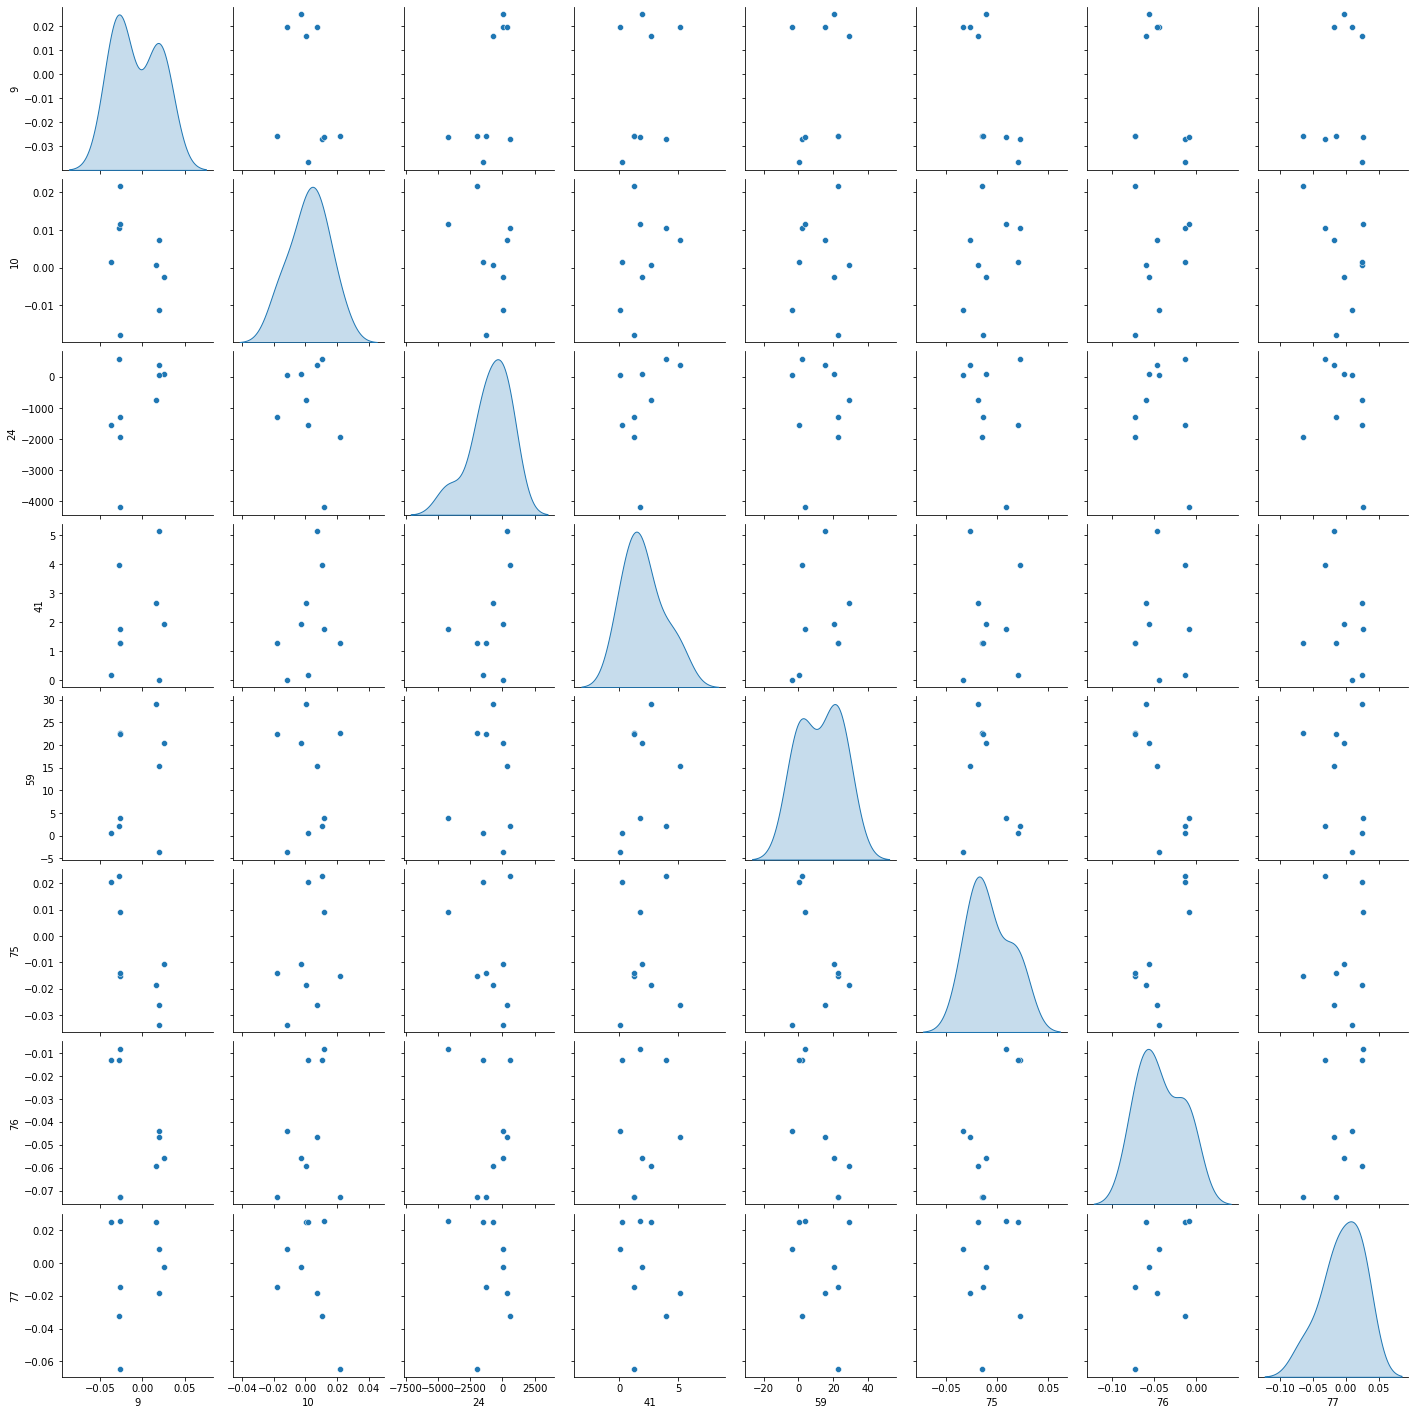

In [35]:
#3B. multivariate analysis
#unable to load the full pairplots, hence using randomly checking for pairplots

af=a1.iloc[:9,1:9]
sns.pairplot(af, diag_kind='kde')

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


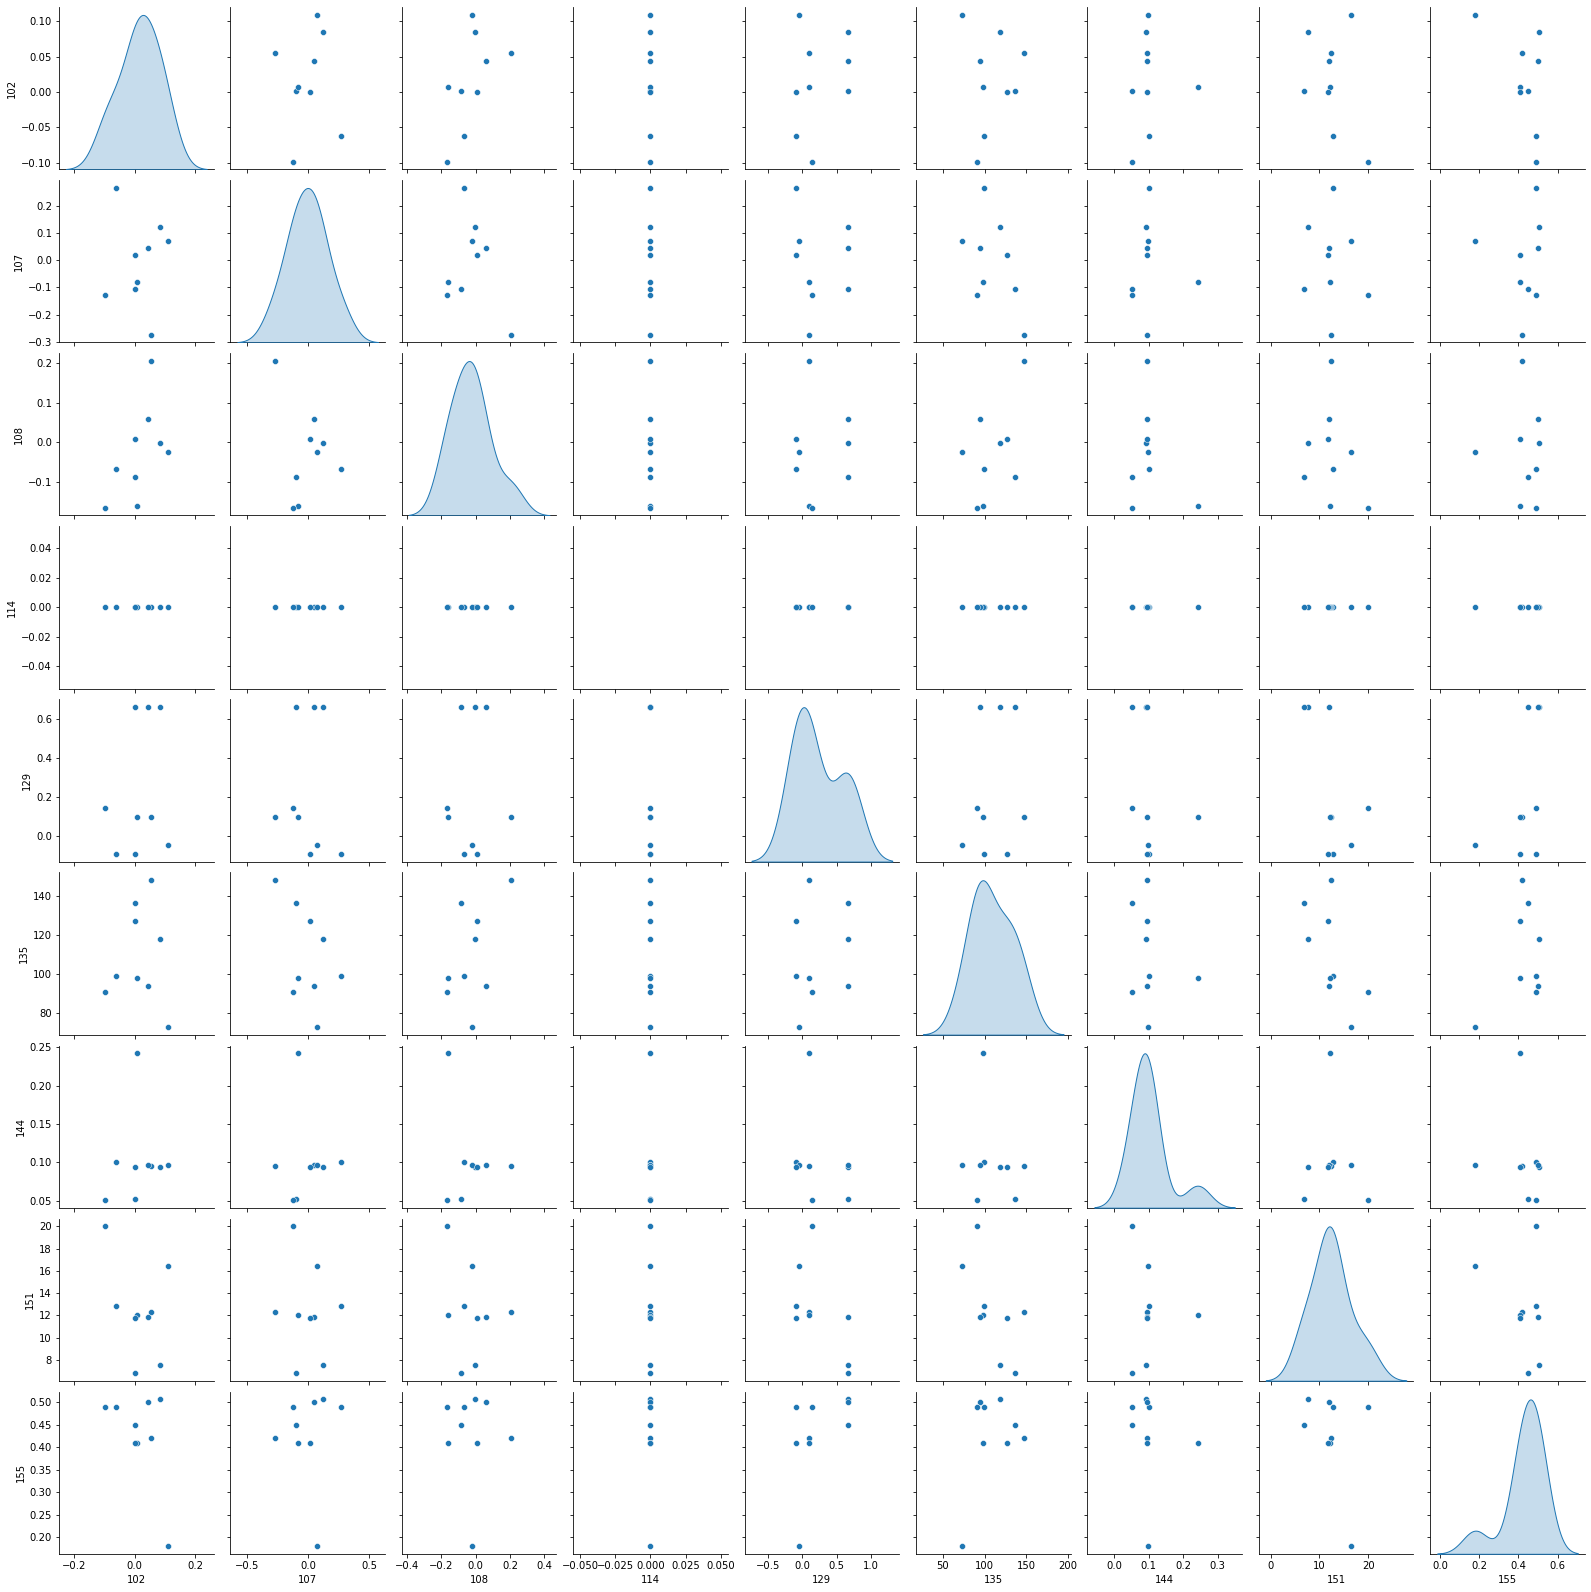

In [73]:
af=a1.iloc[100:109,20:29]
sns.pairplot(af, diag_kind='kde')

In [136]:
#3a analysing the dsitribution of Pass/Fail and it is heavily biased. must be handled in data preprocessing

Y1 = a1['Pass/Fail']

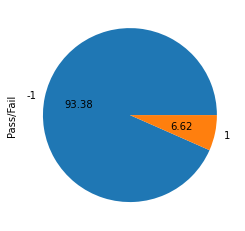

In [137]:
ax = Y1.value_counts().plot.pie(autopct='%.2f')

In [139]:

a2=a1

Y =pd.DataFrame(a2['Pass/Fail'])
a2.shape
X = a2.drop('Pass/Fail', axis=1)

(1164, 73)

In [157]:
#1B can also be considered for the same.

In [156]:
#3b
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

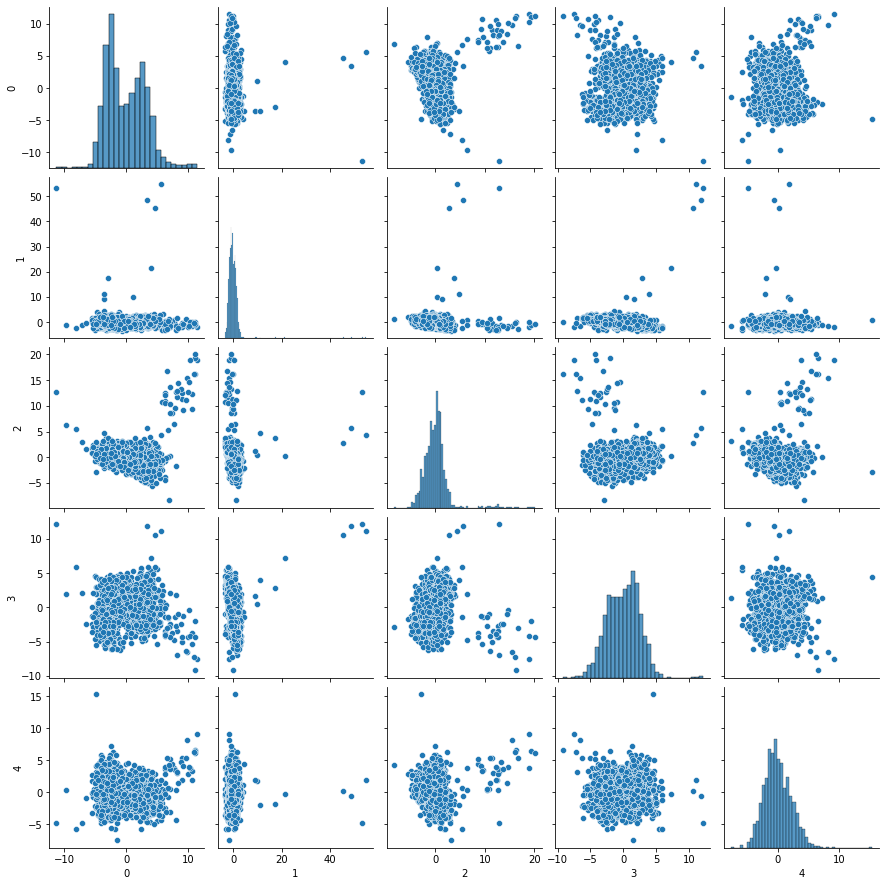

In [141]:
sns.pairplot(pd.DataFrame(x_pca))

due to high number of values could not find any effective patterns, tried to redcue the dimensions by 5 to understand a 
general pattern of data points. and it can be seen that values are distibuted and centered around 0

In [15]:
#4A
X = a1.drop('Pass/Fail', axis=1)
Y = a1['Pass/Fail']

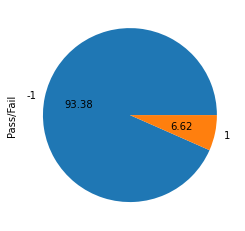

In [16]:
#4B

ax = Y.value_counts().plot.pie(autopct='%.2f')

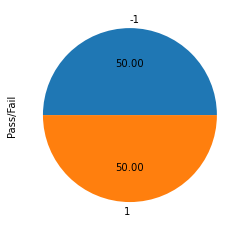

In [17]:
from imblearn.over_sampling import SMOTENC
oversample = SMOTENC(categorical_features=[0,1], random_state = 100)
X1, Y1 = oversample.fit_resample(X, Y)
ax = Y1.value_counts().plot.pie(autopct='%.2f')

In [139]:
#4c
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.20)



In [147]:
#4d
train=pd.DataFrame(X_train.describe().transpose())
trainround = np.round(train,decimals = 2)
test=pd.DataFrame(X_test.describe().transpose())
testround = np.round(test,decimals = 2)
org=pd.DataFrame(X.describe().transpose())
orground = np.round(org,decimals = 2)

In [144]:
trainround

,count,mean,std,min,25%,50%,75%,max
4,1739.0,1.34,0.44,0.68,1.05,1.30,1.53,4.20
9,1739.0,-0.00,0.01,-0.05,-0.01,-0.00,0.01,0.05
10,1739.0,0.00,0.01,-0.03,-0.01,0.00,0.01,0.04
24,1739.0,-507.29,2583.70,-11705.33,-1595.94,-127.83,955.75,10981.50
41,1739.0,3.25,0.92,0.03,2.69,3.08,3.59,6.25
...,...,...,...,...,...,...,...,...
572,1739.0,12.45,27.24,3.54,7.64,8.69,9.94,287.19
583,1739.0,0.01,0.01,0.01,0.01,0.01,0.02,0.05
586,1739.0,0.02,0.01,-0.01,0.02,0.02,0.03,0.06
587,1739.0,0.02,0.01,0.00,0.01,0.02,0.02,0.05


In [145]:
testround

,count,mean,std,min,25%,50%,75%,max
4,435.0,1.30,0.34,0.68,1.03,1.30,1.52,2.54
9,435.0,-0.00,0.01,-0.05,-0.01,-0.00,0.01,0.04
10,435.0,0.00,0.01,-0.03,-0.00,0.00,0.01,0.03
24,435.0,-239.97,2468.99,-9084.34,-1417.68,-14.04,1328.25,11034.75
41,435.0,3.19,0.91,-0.08,2.60,3.08,3.62,6.16
...,...,...,...,...,...,...,...,...
572,435.0,11.80,26.65,5.22,7.44,8.72,9.82,283.03
583,435.0,0.02,0.01,0.01,0.01,0.01,0.02,0.05
586,435.0,0.02,0.01,-0.01,0.02,0.02,0.03,0.05
587,435.0,0.02,0.01,0.00,0.01,0.02,0.02,0.05


In [146]:
orground

,count,mean,std,min,25%,50%,75%,max
4,1164.0,1.36,0.49,0.68,1.02,1.32,1.53,4.20
9,1164.0,-0.00,0.01,-0.05,-0.01,-0.00,0.01,0.05
10,1164.0,0.00,0.01,-0.03,-0.01,0.00,0.01,0.04
24,1164.0,-274.75,2852.83,-11705.33,-1504.69,-57.38,1401.38,11034.75
41,1164.0,3.20,0.95,-0.08,2.70,3.07,3.46,6.25
...,...,...,...,...,...,...,...,...
572,1164.0,12.46,30.04,3.54,7.47,8.59,9.92,287.19
583,1164.0,0.01,0.01,0.01,0.01,0.01,0.02,0.05
586,1164.0,0.02,0.01,-0.01,0.01,0.02,0.03,0.06
587,1164.0,0.02,0.01,0.00,0.01,0.01,0.02,0.05


Not the most effective way, however by visual analysis of checking random values, they lie very similar and close 
to each other. hence, considering they are stastically same.

In [174]:
#Model training, testing and tuning:

In [20]:
#5a and b

from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train.values.ravel())
pred_test = logreg.predict(X_test)



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_test)

0.728735632183908

In [186]:
num_folds = 10


kfold = KFold(n_splits=num_folds)
model = LogisticRegression()
results = cross_val_score(model, X1, Y1, cv=kfold)


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [187]:
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.38990826 0.56422018 0.66055046 0.51834862 0.5483871  0.67281106
 0.56682028 0.61290323 0.58986175 0.56221198]
Accuracy: 56.860% (7.527%)


In [188]:
from sklearn.model_selection import LeaveOneOut
#prepare cross validation
loocv= LeaveOneOut()
model = LogisticRegression()
results = cross_val_score(model, X1, Y1, cv=loocv)


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [189]:
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 66.881% (47.064%)


In [137]:
#5c
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [23]:


grid=GridSearchCV(LogisticRegression(),parameters)   
grid.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [24]:
print(grid.best_params_)
print("Accuracy :",grid.best_score_)



{'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.7630643611911624


In [99]:
#5 D. Will try other techniques to improve efficiancy.
#XandY are the variables.

from imblearn.over_sampling import SMOTENC
oversample = SMOTENC(categorical_features=[0,1], random_state = 100)
X1, Y1 = oversample.fit_resample(X, Y)


scaler = StandardScaler()
scaler.fit(X1)
XScaled = scaler.transform(X1)


In [100]:
pca = PCA(n_components=72)
pca.fit(XScaled)

PCA(n_components=72)

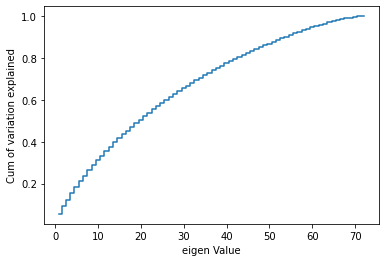

In [101]:
plt.step(list(range(1,73)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [102]:
pca = PCA(n_components=60)
pca.fit(XScaled)

PCA(n_components=60)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XScaled, Y1, test_size=0.20)

In [135]:


lr = LogisticRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test)

scorelrtest = lr.score(X_test, y_test)
scorelrtrain = lr.score(X_train, y_train)

logte= print(scorelrtest)
logtr= print(scorelrtrain)

0.7977011494252874
0.8056354226566993


In [136]:

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          -1       0.85      0.77      0.81       239
           1       0.75      0.83      0.79       196

    accuracy                           0.80       435
   macro avg       0.80      0.80      0.80       435
weighted avg       0.80      0.80      0.80       435



#5e
1.precision means how many right predications out of all the predictions. 85% of -1 is predicted correctly and 75% for1.
2.recall is when for correct -1 how many were correctly predicted as -1. and 77% for 1 and 83 of the 1s were correctly predicted.
3.F1 score is 2*(p*r)/(p+r). 0.81 for -1 and 0.79 for 1.It sums up the predictive performance of a model by combining two otherwise competing metrics — precision and recall
4. Accuracy has increased to 80% and it represents how close a measurement comes to its true value. 

In [130]:
#5F

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

score3 = dt.score(X_test, y_test)
pred = dt.predict(X_test)

score2rtest = dt.score(X_test, y_test)
score2rtrain = dt.score(X_train, y_train)

dtte= print(score2rtest)
dttr= print(score2rtrain)

0.8574712643678161
1.0


In [120]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

score3rtest = rf.score(X_test, y_test)
score3rtrain = rf.score(X_train, y_train)

dtte= print(score3rtest)
dttr= print(score3rtrain)

0.9908045977011494
1.0


In [128]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

score4rtest = classifier.score(X_test, y_test)
score4rtrain = classifier.score(X_train, y_train)

scte= print(score4rtest)
sctr= print(score4rtrain)

0.7793103448275862
0.816561242093157


In [129]:
#6A.
logte= print(scorelrtest)
logtr= print(scorelrtrain)

dtte= print(score2rtest)
dttr= print(score2rtrain)

dtte= print(score3rtest)
dttr= print(score3rtrain)

scte= print(score4rtest)
sctr= print(score4rtrain)

0.7977011494252874
0.8056354226566993
0.8298850574712644
1.0
0.9908045977011494
1.0
0.7793103448275862
0.816561242093157


#6B RandomForestClassifier is showing 99 score for test data. Hence, will choose this model.

In [126]:
#6c

import pickle

with open('model_pickle','wb') as file:
    pickle.dump(rf,file)

#6d

A data set with large number features, it important to explore all ways to reduce features and rows based 
on multiple techniques implemented above. Imbalanced data can cause a bias, hence must balance the target variable.
Can try running multiple algorithms along with hyper parameter tuning to obtain the best result. the best model can be stored
for future use with the help of pickle.